<h1 style="color:blue"> Medical Insurance Predictor Model </h1>

Health insurance is an insurance product which covers medical and surgical expenses of an insured individual. It reimburses the expenses incurred due to illness or injury or pays the care provider of the insured individual directly.

In [1]:
# Import necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import tensorflow as tf

In [2]:
#Importin the data set

data = pd.read_csv( "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv" )

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


***Dataset don't have any Null values***

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# One-hot Encoding

data1 = pd.get_dummies(data, drop_first=True)

In [7]:
# Let's split the dataset into inputs & labels

X = data1.drop(columns=["charges"])   # X - Data
y = data1["charges"]       # y - Labels

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model_1

In [10]:
tf.random.set_seed(42)

# Build the model
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ], name = "Medical_Insurance_Predictor_1"
)

# Compile the model
model_1.compile( loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mae"]
                )

# Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8622.7656 - mae: 8622.7656
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7888.7065 - mae: 7888.7065
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7609.7412 - mae: 7609.7412
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7788.2974 - mae: 7788.2974
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7665.2529 - mae: 7665.2529
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7662.0391 - mae: 7662.0391
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7577.1016 - mae: 7577.1016
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7825.6167 - mae: 7825.6167
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7464.4756 - mae: 7464.4756
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7727.0820 - mae: 7727.0820

In [11]:
model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7999.9692 - mae: 7999.9692


[7999.96923828125, 7999.96923828125]

## Model_2

In [12]:
tf.random.set_seed(42)

# Build the model
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ], name = "Medical_Insurance_Predictor_2"
)

# Compile the model
model_2.compile( loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["mae"]
                )

# Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13273.5039 - mae: 13273.5039
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13106.1074 - mae: 13106.1074
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12755.9971 - mae: 12755.9971
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12074.5029 - mae: 12074.5029
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10943.2773 - mae: 10943.2773
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9497.8984 - mae: 9497.8984
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8163.3486 - mae: 8163.3486
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7514.0991 - mae: 7514.0991
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7405.3110 - mae: 7405.3110
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7387.0762 - mae:

In [13]:
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6003.9653 - mae: 6003.9653


[6003.96533203125, 6003.96533203125]

## Model_3

In [14]:
tf.random.set_seed(42)

# Build the model
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ], name = "Medical_Insurance_Predictor_3"
)

# Compile the model
model_3.compile( loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["mae"]
                )

# Fit the model
history = model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13273.5039 - mae: 13273.5039
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13106.1074 - mae: 13106.1074
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12755.9971 - mae: 12755.9971
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12074.5029 - mae: 12074.5029
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10943.2773 - mae: 10943.2773
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9497.8984 - mae: 9497.8984
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8163.3486 - mae: 8163.3486
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7514.0991 - mae: 7514.0991
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7405.3110 - mae: 7405.3110
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7387.0762 - mae:

In [15]:
model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3443.2954 - mae: 3443.2954


[3443.29541015625, 3443.29541015625]

### Model_3 Performence Curve

Text(0, 0.5, 'losses')

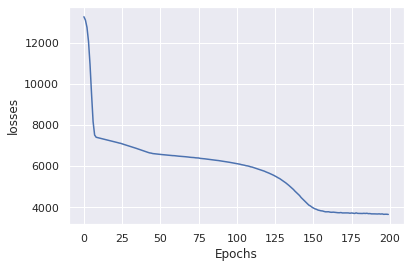

In [16]:
sns.lineplot(x=history.epoch, y=history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("losses")

## Model_4

In [17]:
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=30)

# Build the model
model_4 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ], name = "Medical_Insurance_Predictor_4"
)

# Compile the model
model_4.compile( loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["mae"]
                )

# Fit the model
model4_history = model_4.fit(X_train, y_train, epochs=500, callbacks=[callback])

Epoch 1/500
34/34 [==============================] - 0s 2ms/step - loss: 13273.5039 - mae: 13273.5039
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13106.1074 - mae: 13106.1074
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 12755.9971 - mae: 12755.9971
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 12074.5029 - mae: 12074.5029
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 10943.2773 - mae: 10943.2773
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 9497.8984 - mae: 9497.8984
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 8163.3486 - mae: 8163.3486
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 7514.0991 - mae: 7514.0991
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 7405.3110 - mae: 7405.3110
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 7387.0762 - mae:

In [18]:
model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3164.6970 - mae: 3164.6970


[3164.697021484375, 3164.697021484375]

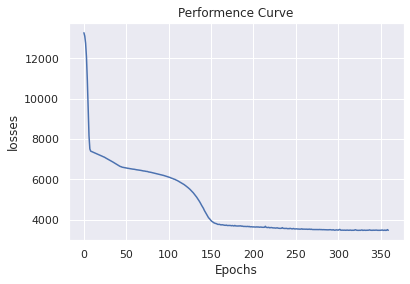

In [19]:
sns.lineplot(x=model4_history.epoch, y=model4_history.history["loss"])
plt.xlabel("Epochs");
plt.ylabel("losses");
plt.title("Performence Curve");

# Preprocessing 

In [21]:
df = pd.read_csv( "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv" )

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [25]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(), ["sex", "smoker", "region"])
)

In [37]:
# Splitting data into variables and labels
X = df.drop(columns=["charges"])
y = df["charges"]

# Splitting training & testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Fit the column transformer on our training data
ct.fit(X_train)

# Now transform our train & test data with MinMaxScaler, OneHotEncoding
X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

In [47]:
# Set random seed for the constant result
tf.random.set_seed(42)

# Setup Earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=30)

# Build the model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ], name = "Medical_Insurance_Predictor"
)

# Compile the model
model.compile(
                loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"]
)

# Fit the model
final_history = model.fit(X_train_norm, y_train, epochs=500, callbacks=[callback])

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

In [48]:
model.evaluate(X_test_norm, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3164.4814 - mae: 3164.4814


[3164.4814453125, 3164.4814453125]

In [49]:
model.summary()

Model: "Medical_Insurance_Predictor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               1200      
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [51]:
from tensorflow.keras.utils import plot_model

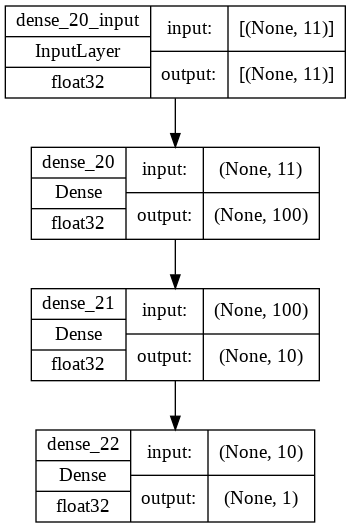

In [53]:
plot_model(model, show_dtype=True, show_shapes=True)

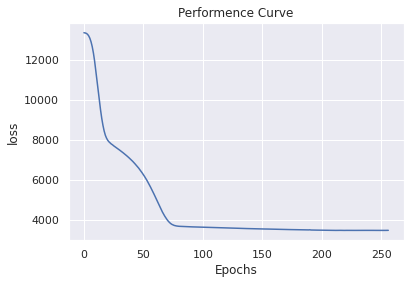

In [55]:
sns.lineplot(x=final_history.epoch, y=final_history.history["loss"])
plt.xlabel("Epochs");
plt.ylabel("loss");
plt.title("Performence Curve");